In [119]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [130]:
df1 = df.sort_values(by=['Date'])
df1['Date'] = pd.to_datetime(df1['Date'])
df1 = df1.drop(['Open', 'High', 'Low', 'Volume','Name'], axis=1)
df1.tail()

,Date,Close
3014,2017-12-22,175.01
3015,2017-12-26,170.57
3016,2017-12-27,170.60
3017,2017-12-28,171.08
3018,2017-12-29,169.23


In [131]:
df1['Value']=df1['Close']
df1 = df1.drop(['Close'], axis=1)
df1.head()

,Date,Value
0,2006-01-03,10.68
1,2006-01-04,10.71
2,2006-01-05,10.63
3,2006-01-06,10.90
4,2006-01-09,10.86


In [132]:
df1['Year'] = df1['Date'].dt.year
df1['Quarter'] = df1['Date'].dt.quarter
df1['Month'] = df1['Date'].dt.month
df1['Week'] = df1['Date'].dt.week
df1['Yearday'] = df1['Date'].dt.dayofyear
df1 = df1.set_index('Date')
df1.head()

,Value,Year,Quarter,Month,Week,Yearday
Date,,,,,,
2006-01-03,10.68,2006,1,1,1,3
2006-01-04,10.71,2006,1,1,1,4
2006-01-05,10.63,2006,1,1,1,5
2006-01-06,10.90,2006,1,1,1,6
2006-01-09,10.86,2006,1,1,2,9


In [133]:
print(len(df1))
df1['Value_zscore'] = (df1['Value'] - df1['Value'].mean())/df1['Value'].std(ddof=0)
df1 = df1[abs(df1['Value_zscore']) < 3]
print(len(df1))

3019
3019


In [134]:
df1['Value'] = df1.Value.diff(3)
df1 = df1.dropna()

In [ ]:
dum1 = pd.get_dummies(df1['Week'])
dum2 = pd.get_dummies(df1['Weekday'])
dum3 = pd.get_dummies(df1['Year'])
df1 = pd.concat([df1, dum1, dum2, dum3], axis=1)

In [135]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

df1 = df1.drop(['Value_zscore'], axis=1)
sc2 = StandardScaler()
df1[['Yearday','Year','Week','Value','Month','Quarter']] = sc2.fit_transform(df1[['Yearday','Year','Week','Value','Month','Quarter']])
df1.head()

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Value,Year,Quarter,Month,Week,Yearday
Date,,,,,,
2006-01-06,0.030131,-1.596468,-1.361078,-1.623227,-1.720213,-1.704486
2006-01-09,-0.004323,-1.596468,-1.361078,-1.623227,-1.653231,-1.675771
2006-01-10,0.374678,-1.596468,-1.361078,-1.623227,-1.653231,-1.666200
2006-01-11,0.458353,-1.596468,-1.361078,-1.623227,-1.653231,-1.656629
2006-01-12,0.502652,-1.596468,-1.361078,-1.623227,-1.653231,-1.647057


In [136]:
n = 1
for x in range(n):
    df1['Value-'+str(x+1)] = df1.Value.shift((x+1))

df1['Value'] = df1.Value.shift(-1)
#df1['Value'] = df1.Value.diff()

df1 = df1.dropna()
df1.head()

,Value,Year,Quarter,Month,Week,Yearday,Value-1
Date,,,,,,,
2006-01-09,0.374678,-1.596468,-1.361078,-1.623227,-1.653231,-1.675771,0.030131
2006-01-10,0.458353,-1.596468,-1.361078,-1.623227,-1.653231,-1.666200,-0.004323
2006-01-11,0.502652,-1.596468,-1.361078,-1.623227,-1.653231,-1.656629,0.374678
2006-01-12,0.256548,-1.596468,-1.361078,-1.623227,-1.653231,-1.647057,0.458353
2006-01-13,-0.024011,-1.596468,-1.361078,-1.623227,-1.653231,-1.637486,0.502652


In [137]:
df3 = df1.copy(deep=False)

In [49]:
#df3 = df3.drop(['Week','Weekday','Year'], axis=1)

In [138]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8 - 1)):]
trains = np.split(train, [1], axis=1)
train_y=trains[0]
train_x=trains[1]
tests = np.split(test, [1], axis=1)
test_y=tests[0]
test_x=tests[1]

In [139]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [140]:
train_x.head()

,Year,Quarter,Month,Week,Yearday,Value-1
Date,,,,,,
2006-01-09,-1.596468,-1.361078,-1.623227,-1.653231,-1.675771,0.030131
2006-01-10,-1.596468,-1.361078,-1.623227,-1.653231,-1.666200,-0.004323
2006-01-11,-1.596468,-1.361078,-1.623227,-1.653231,-1.656629,0.374678
2006-01-12,-1.596468,-1.361078,-1.623227,-1.653231,-1.647057,0.458353
2006-01-13,-1.596468,-1.361078,-1.623227,-1.653231,-1.637486,0.502652


### Trend Seasonal Analysis

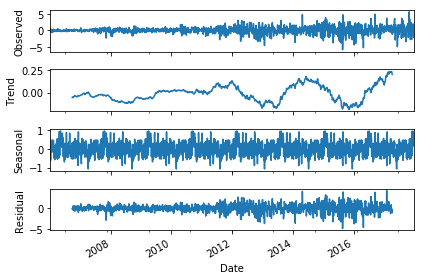

In [141]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
result = seasonal_decompose(df3.Value, model='additive', freq=365)
result.plot()
plt.show()

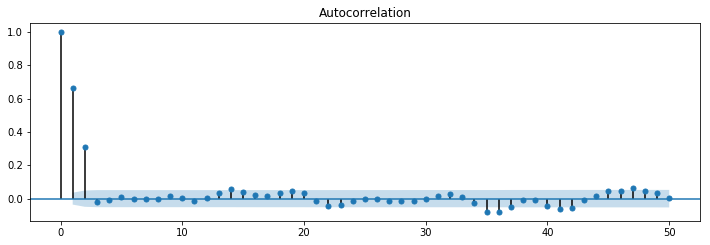

In [143]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df3.Value, lags=50, ax=ax1)

### Naive Test: Linear Regression

In [144]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.values)
reg.score(train_x.values, train_y.values)

reg.coef_

array([[ 0.02673574,  0.11315137, -0.42242236,  0.07733584,  0.23264249,
         0.31523708]])

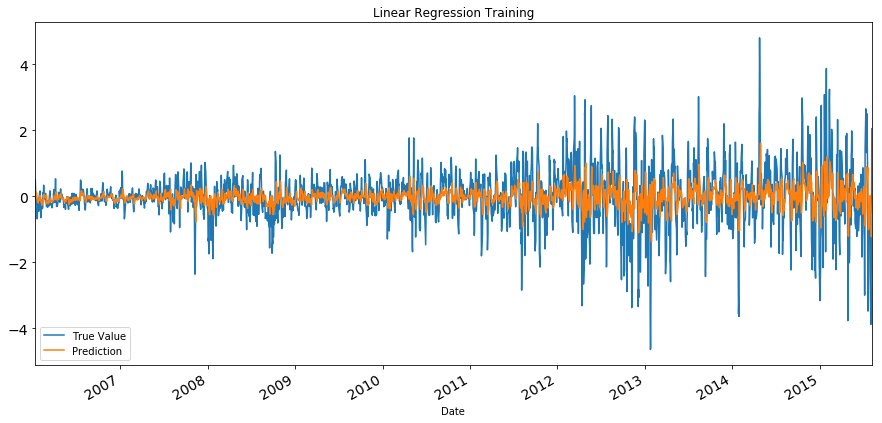

adj train r^2 = 0.10235931550062338
train mse = 0.6313277407854798


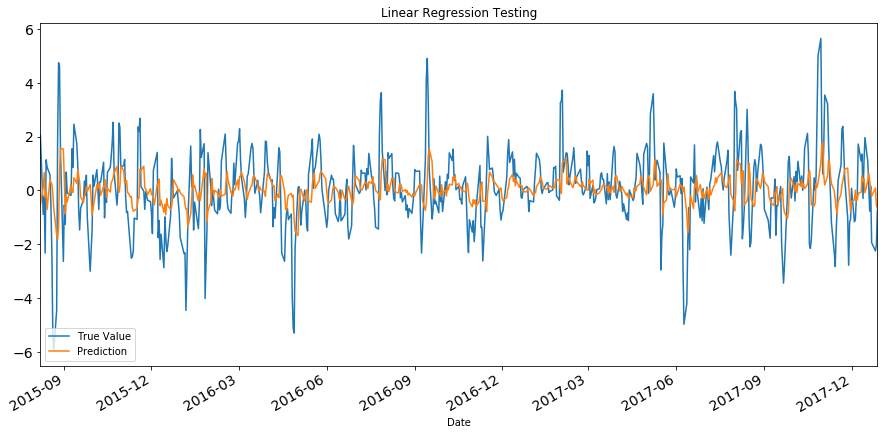

['Year', 'Quarter', 'Month', 'Week', 'Yearday', 'Value-1']
adj test r^2 = 0.08065139414365019
test mse = 2.001027650885774


In [145]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['Value'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.Value, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.Value, reg.predict(train_x.values))))
test_y['Value'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.Value, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.Value, test_y.prediction)))

### Naive Test: SARIMAX

In [146]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
auto_arima(df3['Value'],seasonal=True,m=7).summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 3014
Model:             SARIMAX(2, 0, 2)x(2, 0, 0, 7)   Log Likelihood               -2604.415
Date:                           Thu, 16 May 2019   AIC                           5224.829
Time:                                   22:46:30   BIC                           5272.918
Sample:                                        0   HQIC                          5242.122
                                          - 3014                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0009      0.032     -0.029      0.977      -0.064       0.062
ar.L1          0.0266      0.012      2.171      0.030       0.003       0.051
ar.L2         -0.0304      0.014     -2.121      0.034      -0.059      -0.002
ma.L1          0.9973      0.015     68.428      0.000       0.969       1.026
ma.L2          0.9999      0.029     34.639      0.000       0.943       1.057
ar.S.L7        0.0233      0.012      1.880      0.060      -0.001       0.048
ar.S.L14       0.0428      0.015      2.926      0.003       0.014       0.072
sigma2         0.3280      0.010     33.614      0.000       0.309       0.347
===================================================================================
Ljung-Box (Q):                       61.10   Jarque-Bera (JB):              6643.75
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):              11.56   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [147]:
train.columns

Index(['Value', 'Year', 'Quarter', 'Month', 'Week', 'Yearday', 'Value-1'], dtype='object')

In [148]:
exog = train[['Year', 'Quarter', 'Month', 'Week', 'Yearday', 'Value-1']].values
model = SARIMAX(train['Value'],exog=exog,order=(2,0,2),
                seasonal_order=(2,0,0,7),
                enforce_invertibility=False, enforce_stationarity=True)
results = model.fit()
results.summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             Value   No. Observations:                 2411
Model:             SARIMAX(2, 0, 2)x(2, 0, 0, 7)   Log Likelihood               -1677.529
Date:                           Thu, 16 May 2019   AIC                           3381.059
Time:                                   22:48:44   BIC                           3456.300
Sample:                                        0   HQIC                          3408.425
                                          - 2411                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0296      0.038      0.778      0.436      -0.045       0.104
x2             0.0115      0.029      0.395      0.693      -0.046       0.069
x3            -0.0313      0.051     -0.612      0.541      -0.131       0.069
x4             0.0035      0.006      0.607      0.544      -0.008       0.015
x5             0.0280      0.031      0.894      0.371      -0.033       0.089
x6             0.2032      0.038      5.313      0.000       0.128       0.278
ar.L1          0.0204      0.014      1.482      0.138      -0.007       0.047
ar.L2         -0.2337      0.038     -6.080      0.000      -0.309      -0.158
ma.L1          1.0033      0.179      5.607      0.000       0.653       1.354
ma.L2          1.0000      0.356      2.808      0.005       0.302       1.698
ar.S.L7       -0.0149      0.013     -1.113      0.266      -0.041       0.011
ar.S.L14       0.0380      0.017      2.175      0.030       0.004       0.072
sigma2         0.2344      0.083      2.831      0.005       0.072       0.397
===================================================================================
Ljung-Box (Q):                       68.10   Jarque-Bera (JB):              7628.85
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               8.14   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


adj test r^2 = -0.28902158419798063
test mse = 2.8056471899102173


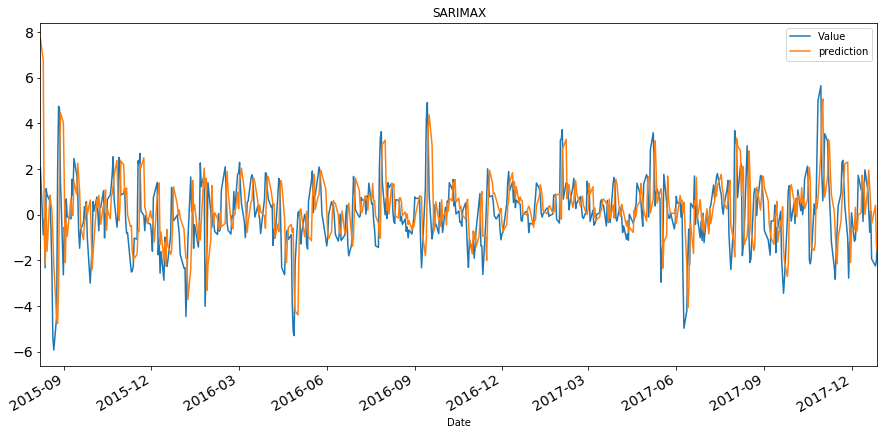

In [154]:
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test[['Year', 'Quarter', 'Month', 'Week', 'Yearday', 'Value-1']]
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX Predictions')

test_y2 = test_y.copy(deep=False)
test_y2['prediction']=predictions.values*4.2
test_y2.plot(figsize=(15,7), title= 'SARIMAX', fontsize=14)
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.Value, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.Value, test_y2.prediction)))

### Model 1: ExtraTrees

In [157]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=500)
reg.fit(train_x.values, train_y.values.ravel())

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

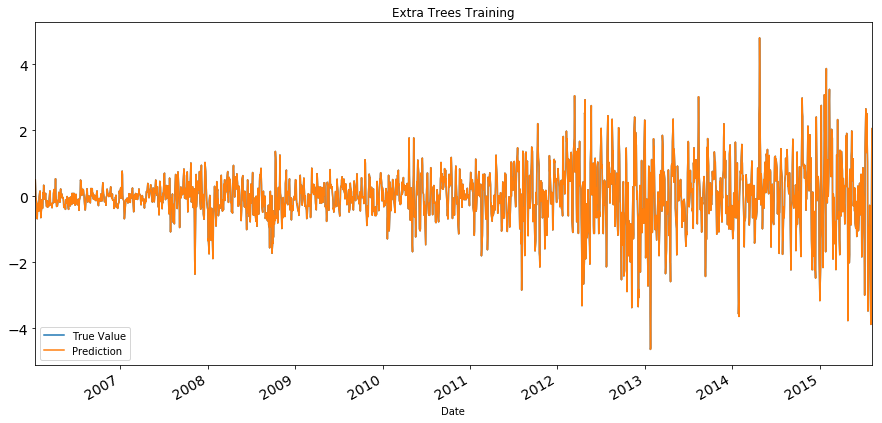

adj train r^2 = 1.0
train mse = 3.3538579758657216e-29


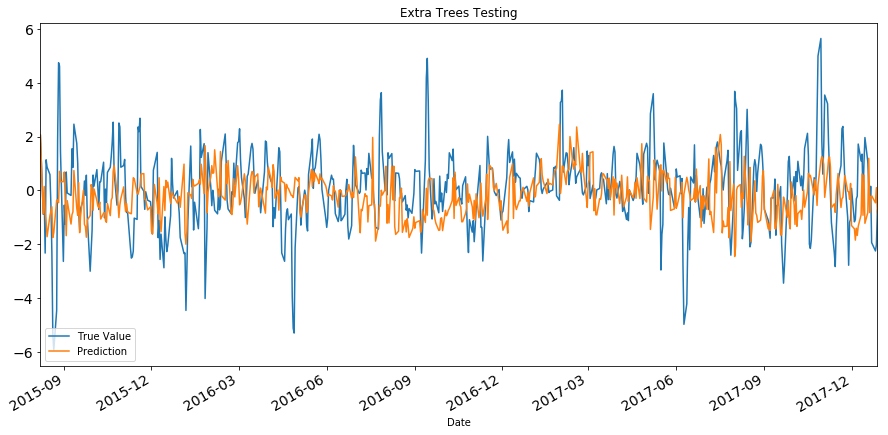

['Year', 'Quarter', 'Month', 'Week', 'Yearday', 'Value-1']
adj test r^2 = -0.1807249432505238
test mse = 2.5699318457486253


In [158]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['Value'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.Value, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.Value, reg.predict(train_x.values))))
test_y['Value'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.Value, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.Value, test_y.prediction)))

### Model 2: Random Forest

In [159]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(train_x.values, train_y.values.ravel())

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

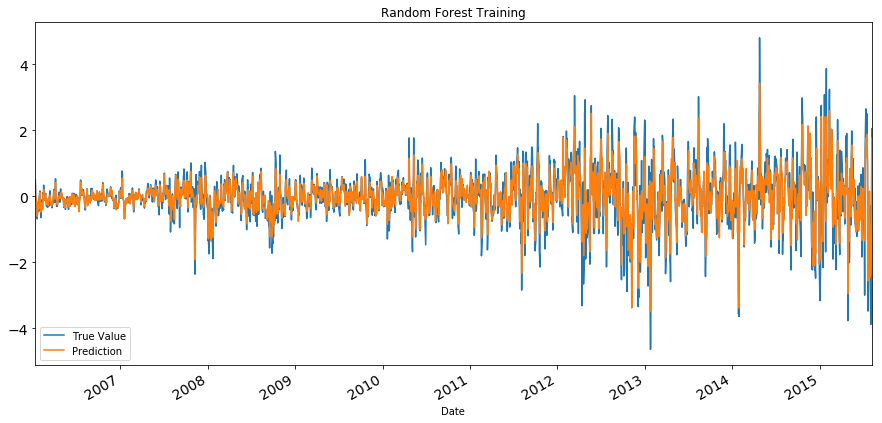

adj train r^2 = 0.8211297541090201
train mse = 0.1258028409163244


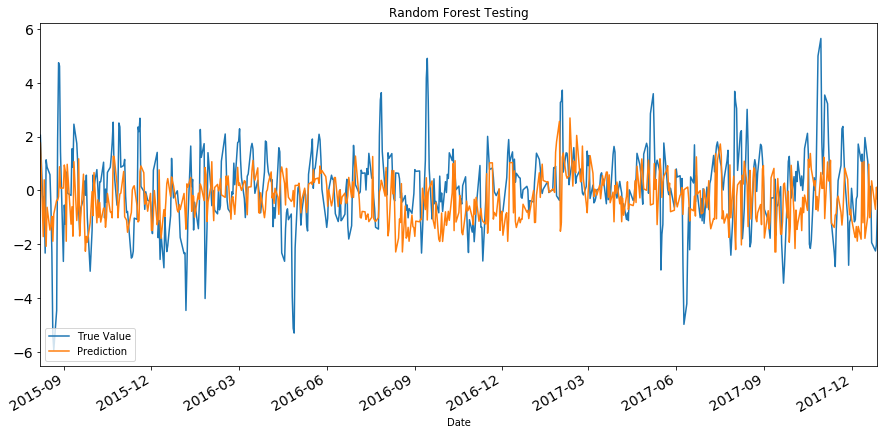

['Year', 'Quarter', 'Month', 'Week', 'Yearday', 'Value-1']
adj test r^2 = -0.2866107264633482
test mse = 2.8003997865219694


In [160]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['Value'].plot(figsize=(15,7), title= 'Random Forest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.Value, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.Value, reg.predict(train_x.values))))
test_y['Value'].plot(figsize=(15,7), title= 'Random Forest Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'Random Forest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.Value, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.Value, test_y.prediction)))

### Model 3: XGBoost

In [161]:
from xgboost import XGBRegressor

reg = XGBRegressor()
reg.fit(train_x.values, train_y.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

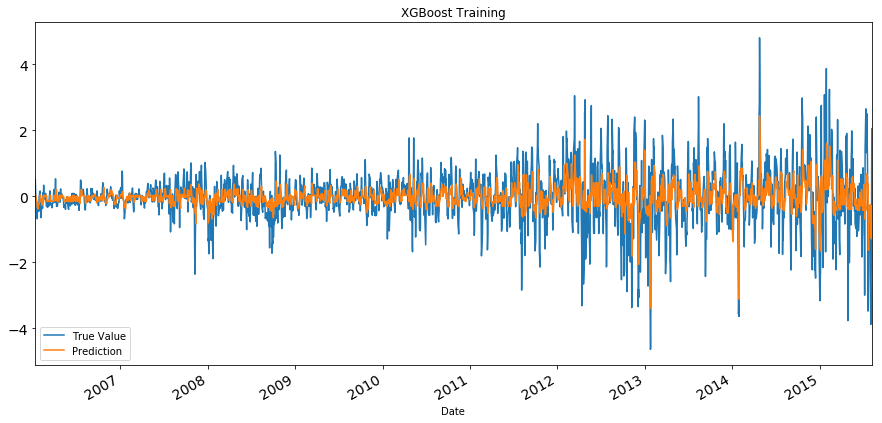

adj train r^2 = 0.2815863681689339
train mse = 0.5052739508864289


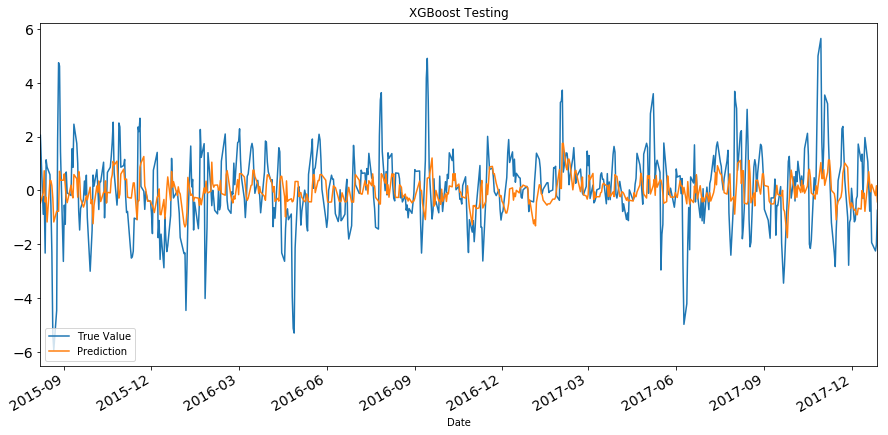

['Year', 'Quarter', 'Month', 'Week', 'Yearday', 'Value-1']
adj test r^2 = 0.047339492044124465
test mse = 2.0735333758959955


In [162]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['Value'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.Value, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.Value, reg.predict(train_x.values))))
test_y['Value'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.Value, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.Value, test_y.prediction)))

### Model 4: Feed Forward Neural Network

In [163]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

In [167]:
#K.clear_session()
model = Sequential()
model.add(Dense(64, input_dim=6, activation='tanh',kernel_regularizer=regularizers.l1(0.00023)))
#model.add(Dropout(0.003))
#model.add(Dense(4, activation='relu',kernel_regularizer=regularizers.l2(0.13)))
#model.add(Dense(2, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, min_delta=.000001,restore_best_weights=True)
        
out = model.fit(train_x.values, train_y.values.ravel(), validation_data=[test_x.values, test_y['Value'].values.ravel()], epochs=50,verbose=1,shuffle=False)

Train on 2411 samples, validate on 604 samples
Epoch 1/50
2411/2411 [==============================] - 1s 349us/step - loss: 0.8055 - val_loss: 2.0041
Epoch 2/50
2411/2411 [==============================] - 0s 71us/step - loss: 0.6480 - val_loss: 2.0041
Epoch 3/50
2411/2411 [==============================] - 0s 62us/step - loss: 0.6483 - val_loss: 2.0047
Epoch 4/50
2411/2411 [==============================] - 0s 63us/step - loss: 0.6485 - val_loss: 2.0052
Epoch 5/50
2411/2411 [==============================] - 0s 62us/step - loss: 0.6487 - val_loss: 2.0055
Epoch 6/50
2411/2411 [==============================] - 0s 62us/step - loss: 0.6488 - val_loss: 2.0058
Epoch 7/50
2411/2411 [==============================] - 0s 71us/step - loss: 0.6489 - val_loss: 2.0061
Epoch 8/50
2411/2411 [==============================] - 0s 62us/step - loss: 0.6489 - val_loss: 2.0062
Epoch 9/50
2411/2411 [==============================] - 0s 60us/step - loss: 0.6489 - val_loss: 2.0064
Epoch 10/50
2411/2411 [==

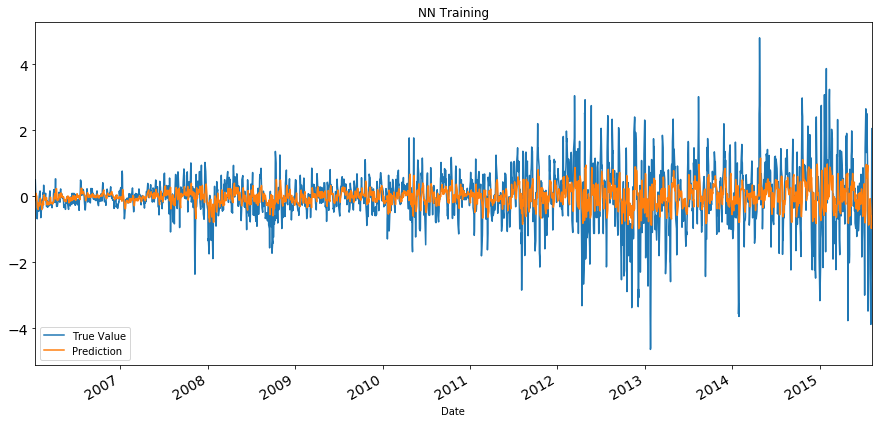

adj train r^2 = 0.10609144540704663
train mse = 0.6287028629442374


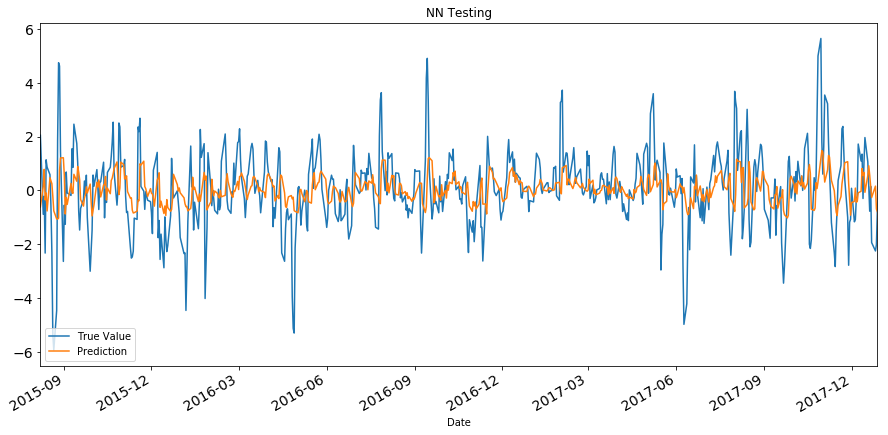

adj test r^2 = 0.08227059826074645
test mse = 1.9975033379210312


In [168]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = model.predict(train_x.values)
test_y['prediction'] = model.predict(test_x.values)
train_y2['Value'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.Value, model.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.Value, model.predict(train_x.values))))
test_y['Value'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.Value, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.Value, test_y.prediction)))

### Model 5: LSTM

In [169]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [174]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(30, input_shape=(1, train_x.values.shape[1]), activation='tanh',kernel_initializer='lecun_uniform'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=15, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.values.ravel(), validation_data=[X_tst_t, test_y['Value'].values.ravel()], epochs=500, verbose=1, shuffle=False)

Train on 2411 samples, validate on 604 samples
Epoch 1/500
2411/2411 [==============================] - 2s 823us/step - loss: 0.6669 - val_loss: 2.0716
Epoch 2/500
2411/2411 [==============================] - 1s 213us/step - loss: 0.6454 - val_loss: 2.0330
Epoch 3/500
2411/2411 [==============================] - 0s 205us/step - loss: 0.6379 - val_loss: 2.0146
Epoch 4/500
2411/2411 [==============================] - 0s 193us/step - loss: 0.6344 - val_loss: 2.0053
Epoch 5/500
2411/2411 [==============================] - 0s 185us/step - loss: 0.6325 - val_loss: 2.0007
Epoch 6/500
2411/2411 [==============================] - 0s 174us/step - loss: 0.6312 - val_loss: 1.9984
Epoch 7/500
2411/2411 [==============================] - 0s 155us/step - loss: 0.6302 - val_loss: 1.9975
Epoch 8/500
2411/2411 [==============================] - 0s 161us/step - loss: 0.6295 - val_loss: 1.9972
Epoch 9/500
2411/2411 [==============================] - 0s 152us/step - loss: 0.6288 - val_loss: 1.9974
Epoch 10

Epoch 78/500
2411/2411 [==============================] - 0s 160us/step - loss: 0.6175 - val_loss: 2.0388
Epoch 79/500
2411/2411 [==============================] - 0s 154us/step - loss: 0.6174 - val_loss: 2.0394
Epoch 80/500
2411/2411 [==============================] - 0s 152us/step - loss: 0.6173 - val_loss: 2.0401
Epoch 81/500
2411/2411 [==============================] - 0s 147us/step - loss: 0.6171 - val_loss: 2.0408
Epoch 82/500
2411/2411 [==============================] - 0s 149us/step - loss: 0.6170 - val_loss: 2.0414
Epoch 83/500
2411/2411 [==============================] - 0s 150us/step - loss: 0.6169 - val_loss: 2.0421
Epoch 84/500
2411/2411 [==============================] - 0s 151us/step - loss: 0.6168 - val_loss: 2.0427
Epoch 85/500
2411/2411 [==============================] - 0s 150us/step - loss: 0.6167 - val_loss: 2.0433
Epoch 86/500
2411/2411 [==============================] - 0s 152us/step - loss: 0.6166 - val_loss: 2.0440
Epoch 87/500
2411/2411 [======================

Epoch 155/500
2411/2411 [==============================] - 0s 155us/step - loss: 0.6101 - val_loss: 2.1038
Epoch 156/500
2411/2411 [==============================] - 0s 150us/step - loss: 0.6100 - val_loss: 2.1050
Epoch 157/500
2411/2411 [==============================] - 0s 151us/step - loss: 0.6099 - val_loss: 2.1060
Epoch 158/500
2411/2411 [==============================] - 0s 152us/step - loss: 0.6098 - val_loss: 2.1073
Epoch 159/500
2411/2411 [==============================] - 0s 149us/step - loss: 0.6097 - val_loss: 2.1085
Epoch 160/500
2411/2411 [==============================] - 0s 155us/step - loss: 0.6096 - val_loss: 2.1097
Epoch 161/500
2411/2411 [==============================] - 0s 150us/step - loss: 0.6095 - val_loss: 2.1109
Epoch 162/500
2411/2411 [==============================] - 0s 151us/step - loss: 0.6094 - val_loss: 2.1121
Epoch 163/500
2411/2411 [==============================] - 0s 150us/step - loss: 0.6093 - val_loss: 2.1133
Epoch 164/500
2411/2411 [============

2411/2411 [==============================] - 0s 152us/step - loss: 0.6033 - val_loss: 2.2145
Epoch 232/500
2411/2411 [==============================] - 0s 153us/step - loss: 0.6033 - val_loss: 2.2164
Epoch 233/500
2411/2411 [==============================] - 0s 148us/step - loss: 0.6032 - val_loss: 2.2183
Epoch 234/500
2411/2411 [==============================] - 0s 192us/step - loss: 0.6031 - val_loss: 2.2199
Epoch 235/500
2411/2411 [==============================] - 0s 177us/step - loss: 0.6030 - val_loss: 2.2216
Epoch 236/500
2411/2411 [==============================] - 1s 265us/step - loss: 0.6029 - val_loss: 2.2234
Epoch 237/500
2411/2411 [==============================] - 1s 232us/step - loss: 0.6028 - val_loss: 2.2251
Epoch 238/500
2411/2411 [==============================] - 1s 225us/step - loss: 0.6028 - val_loss: 2.2268
Epoch 239/500
2411/2411 [==============================] - 1s 225us/step - loss: 0.6027 - val_loss: 2.2285
Epoch 240/500
2411/2411 [==========================

2411/2411 [==============================] - 0s 154us/step - loss: 0.5971 - val_loss: 2.3577
Epoch 308/500
2411/2411 [==============================] - 0s 154us/step - loss: 0.5970 - val_loss: 2.3598
Epoch 309/500
2411/2411 [==============================] - 0s 149us/step - loss: 0.5969 - val_loss: 2.3620
Epoch 310/500
2411/2411 [==============================] - 0s 155us/step - loss: 0.5968 - val_loss: 2.3640
Epoch 311/500
2411/2411 [==============================] - 0s 152us/step - loss: 0.5968 - val_loss: 2.3661
Epoch 312/500
2411/2411 [==============================] - 0s 153us/step - loss: 0.5967 - val_loss: 2.3681
Epoch 313/500
2411/2411 [==============================] - 0s 175us/step - loss: 0.5966 - val_loss: 2.3703
Epoch 314/500
2411/2411 [==============================] - 0s 159us/step - loss: 0.5965 - val_loss: 2.3723
Epoch 315/500
2411/2411 [==============================] - 0s 152us/step - loss: 0.5964 - val_loss: 2.3741
Epoch 316/500
2411/2411 [==========================

2411/2411 [==============================] - 0s 162us/step - loss: 0.5911 - val_loss: 2.5294
Epoch 384/500
2411/2411 [==============================] - 0s 153us/step - loss: 0.5911 - val_loss: 2.5319
Epoch 385/500
2411/2411 [==============================] - 0s 152us/step - loss: 0.5909 - val_loss: 2.5345
Epoch 386/500
2411/2411 [==============================] - 0s 157us/step - loss: 0.5909 - val_loss: 2.5370
Epoch 387/500
2411/2411 [==============================] - 0s 152us/step - loss: 0.5908 - val_loss: 2.5393
Epoch 388/500
2411/2411 [==============================] - 0s 158us/step - loss: 0.5907 - val_loss: 2.5417
Epoch 389/500
2411/2411 [==============================] - 0s 144us/step - loss: 0.5906 - val_loss: 2.5442
Epoch 390/500
2411/2411 [==============================] - 0s 153us/step - loss: 0.5905 - val_loss: 2.5469
Epoch 391/500
2411/2411 [==============================] - 0s 155us/step - loss: 0.5905 - val_loss: 2.5495
Epoch 392/500
2411/2411 [==========================

2411/2411 [==============================] - 0s 157us/step - loss: 0.5848 - val_loss: 2.7265
Epoch 460/500
2411/2411 [==============================] - 0s 150us/step - loss: 0.5847 - val_loss: 2.7288
Epoch 461/500
2411/2411 [==============================] - 0s 158us/step - loss: 0.5846 - val_loss: 2.7312
Epoch 462/500
2411/2411 [==============================] - 0s 156us/step - loss: 0.5846 - val_loss: 2.7343
Epoch 463/500
2411/2411 [==============================] - 0s 153us/step - loss: 0.5845 - val_loss: 2.7370
Epoch 464/500
2411/2411 [==============================] - 0s 149us/step - loss: 0.5844 - val_loss: 2.7392
Epoch 465/500
2411/2411 [==============================] - 0s 153us/step - loss: 0.5843 - val_loss: 2.7424
Epoch 466/500
2411/2411 [==============================] - 0s 155us/step - loss: 0.5842 - val_loss: 2.7446
Epoch 467/500
2411/2411 [==============================] - 0s 157us/step - loss: 0.5841 - val_loss: 2.7474
Epoch 468/500
2411/2411 [==========================

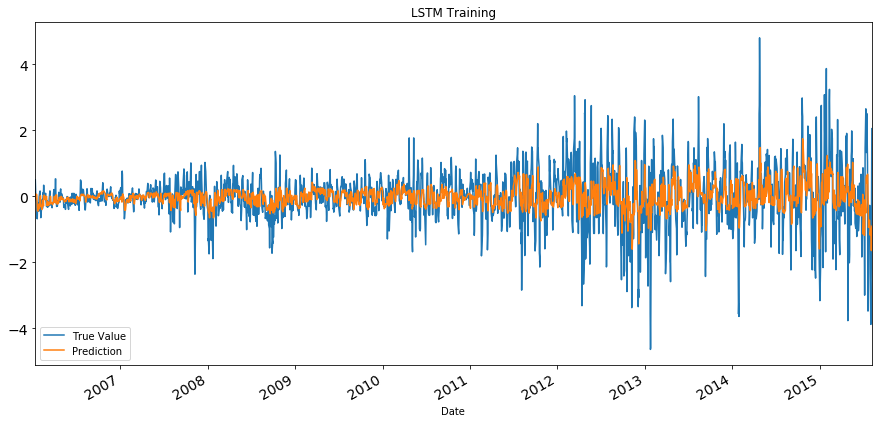

adj train r^2 = 0.1798464515239504
train mse = 0.576829566437659


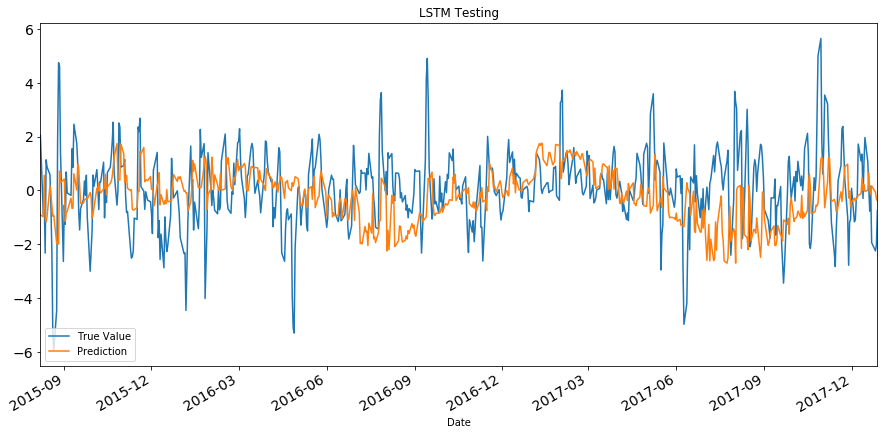

adj test r^2 = -0.3025560701051839
test mse = 2.835105961445103


In [175]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = model_lstm.predict(X_tr_t)
test_y['prediction'] = model_lstm.predict(X_tst_t)
train_y2['Value'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.Value, model_lstm.predict(X_tr_t))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.Value, model_lstm.predict(X_tr_t))))
test_y['Value'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.Value, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.Value, test_y.prediction)))

### Model 6: TPOT

In [176]:
def my_custom_accuracy(y_true, y_pred):
    
    return (adj_r2_score((r2_score(y_true, y_pred)),train_x.shape[0], train_x.shape[1]))

In [177]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(population_size=10, max_time_mins=5, verbosity=2, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.values.ravel())

Generation 1 - Current best internal CV score: -0.6353178171420606
Generation 2 - Current best internal CV score: -0.6346516985220335
Generation 3 - Current best internal CV score: -0.6346516985220335
Generation 4 - Current best internal CV score: -0.6345891229624974
Generation 5 - Current best internal CV score: -0.6345891229624973
Generation 6 - Current best internal CV score: -0.6345891229624973
Generation 7 - Current best internal CV score: -0.6345891229624973
Generation 8 - Current best internal CV score: -0.6345891229624973
Generation 9 - Current best internal CV score: -0.6345891229624973
Generation 10 - Current best internal CV score: -0.6345891229624973
Generation 11 - Current best internal CV score: -0.6345891229624973
Generation 12 - Current best internal CV score: -0.6345891229624973
Generation 13 - Current best internal CV score: -0.6345891229624973
Generation 14 - Current best internal CV score: -0.6344720426464525
Generation 15 - Current best internal CV score: -0.634472

TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=5, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=10,
       random_state=None, scoring=None, subsample=1.0, use_dask=False,
       verbosity=2, warm_start=False)

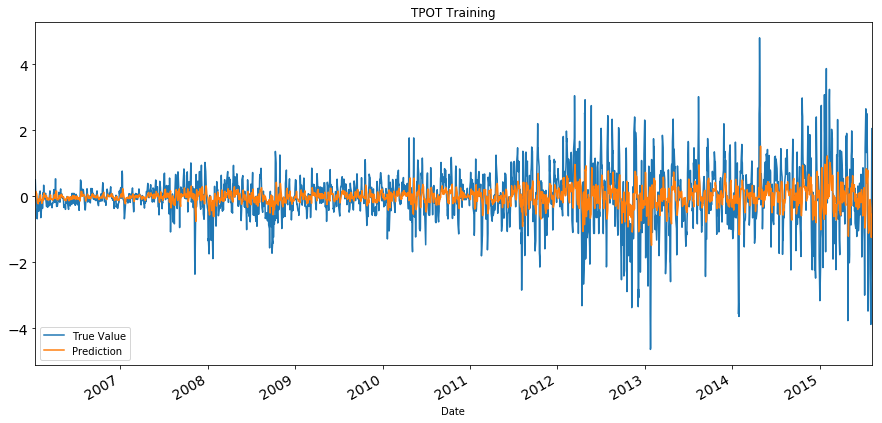

adj train r^2 = 0.09923354033719234
train mse = 0.6335261578205018


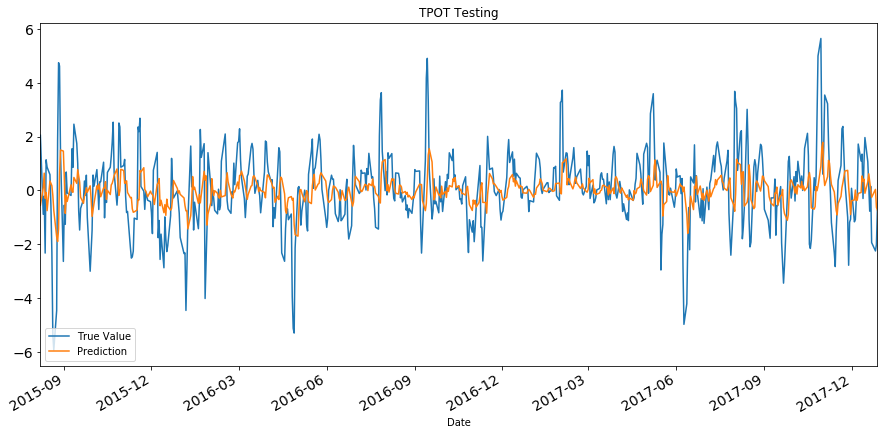

adj test r^2 = 0.0791582539501271
test mse = 2.0042775767516052


In [178]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = tpot.predict(train_x.values)
test_y['prediction'] = tpot.predict(test_x.values)
train_y2['Value'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.Value, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.Value, train_y2.prediction)))
test_y['Value'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.Value, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.Value, test_y.prediction)))